In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings("ignore")
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Initial EDA

In [3]:
#from pandas_profiling import ProfileReport

In [7]:
#profile = ProfileReport(train, title="Train Profiling Report", explorative=True)

In [8]:
#profile.to_file('train_eda.html')

# Checking columns with null values

In [3]:
for col in train.columns:
    if train[col].isnull().sum() > 0:
        print(col,":",train[col].isnull().sum())

StateOfPreviousResidence : 794
MigCodeChangeInMsa : 112154
MigCodeChangeInReg : 112154
MigCodeMoveWithinReg : 112154
MigPrevResInSunbelt : 112154
CntryOfBirthFather : 7498
CntryOfBirthMother : 6843
CntryOfBirthSelf : 3869


In [4]:
for col in test.columns:
    if test[col].isnull().sum() > 0:
        print(col,":",test[col].isnull().sum())

StateOfPreviousResidence : 244
MigCodeChangeInMsa : 37488
MigCodeChangeInReg : 37488
MigCodeMoveWithinReg : 37488
MigPrevResInSunbelt : 37488
CntryOfBirthFather : 2644
CntryOfBirthMother : 2348
CntryOfBirthSelf : 1288


## We can see that the columns with null values in train data are the same as test data.
## We can apply categorical imputation to the columns with SimpleImputer.

In [5]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [6]:
su = SimpleImputer(strategy="most_frequent")

In [7]:
train_null_cols = []
for col in train.columns:
    if train[col].isnull().sum() > 0:
        train_null_cols.append(col)

In [8]:
train_null_cols

['StateOfPreviousResidence',
 'MigCodeChangeInMsa',
 'MigCodeChangeInReg',
 'MigCodeMoveWithinReg',
 'MigPrevResInSunbelt',
 'CntryOfBirthFather',
 'CntryOfBirthMother',
 'CntryOfBirthSelf']

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ("cats", su,train_null_cols)
    ], n_jobs=-1
)

In [10]:
train[train_null_cols] = preprocessor.fit_transform(train)

In [11]:
for col in train.columns:
    if train[col].isnull().sum() > 0:
        print(col,":",train[col].isnull().sum())

# EDA

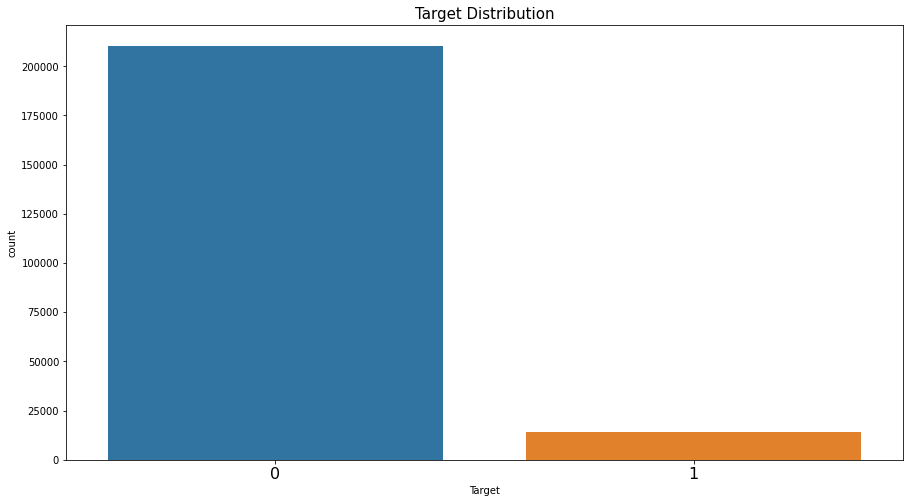

In [12]:
plt.figure(figsize=(15,8))
sns.countplot(train['Target'])
plt.title('Target Distribution', fontsize=15)
plt.xticks(fontsize=16)
plt.show()

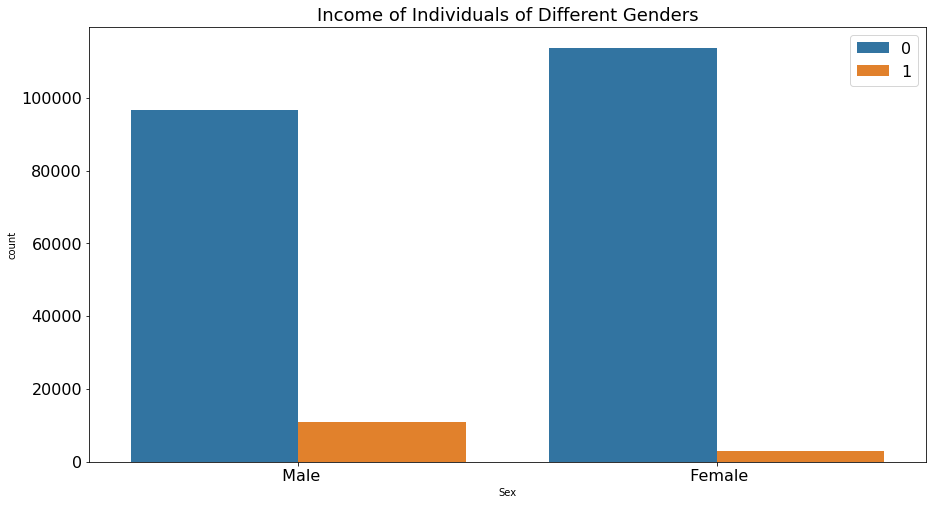

In [13]:
plt.figure(figsize=(15,8))
sns.countplot(train['Sex'], hue = train['Target'])
plt.title('Income of Individuals of Different Genders', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.show()

In [14]:
cnt_srs = train['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        showscale=True
    ),
)
layout = go.Layout(
    title='Age distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

In [15]:
cnt_srs = train[train.Target == 1]['Age'].value_counts()
trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        showscale=True
    ),
)
layout = go.Layout(
    title='Age distribution > 50k'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="age")

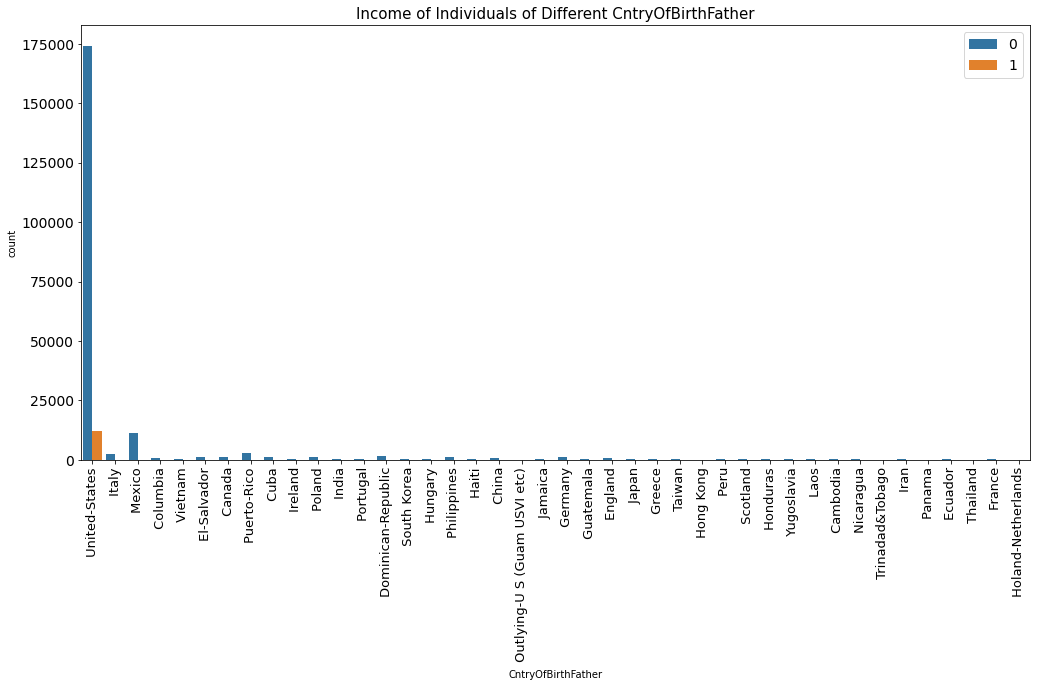

In [16]:
plt.figure(figsize=(17,8))
sns.countplot(train['CntryOfBirthFather'], hue = train['Target'])
plt.title('Income of Individuals of Different CntryOfBirthFather', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

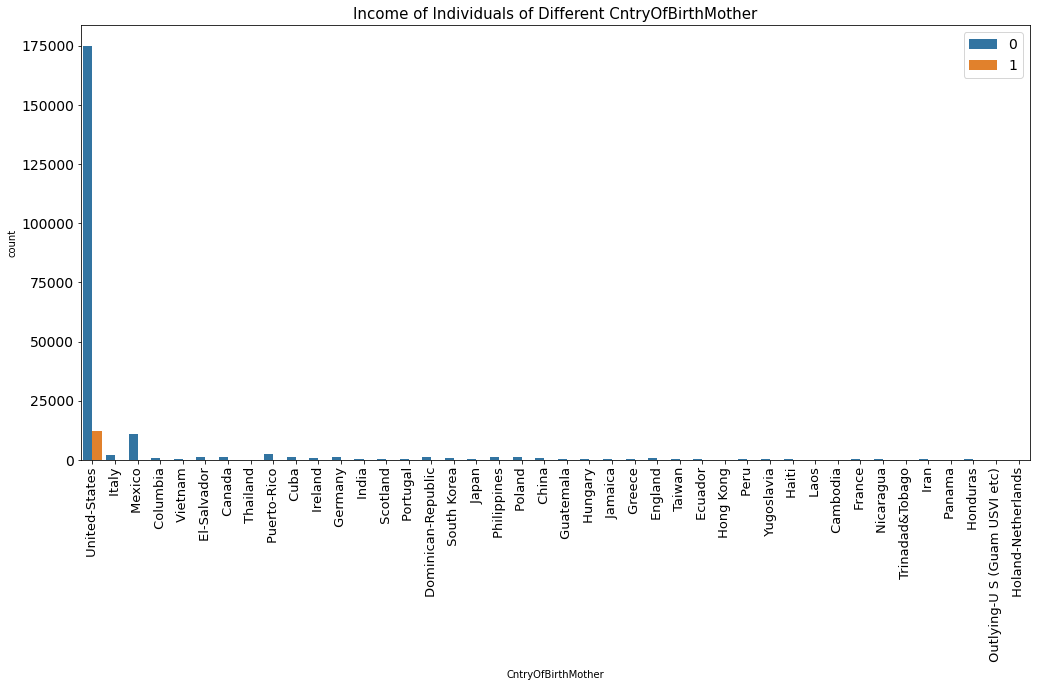

In [17]:
plt.figure(figsize=(17,8))
sns.countplot(train['CntryOfBirthMother'], hue = train['Target'])
plt.title('Income of Individuals of Different CntryOfBirthMother', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

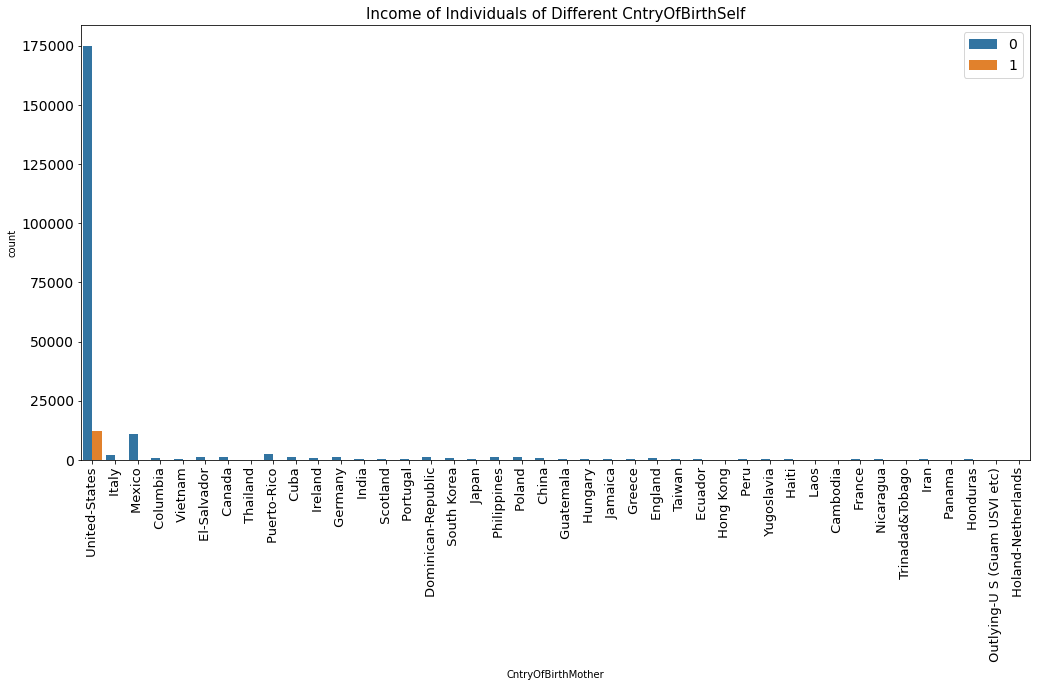

In [18]:
plt.figure(figsize=(17,8))
sns.countplot(train['CntryOfBirthMother'], hue = train['Target'])
plt.title('Income of Individuals of Different CntryOfBirthSelf', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

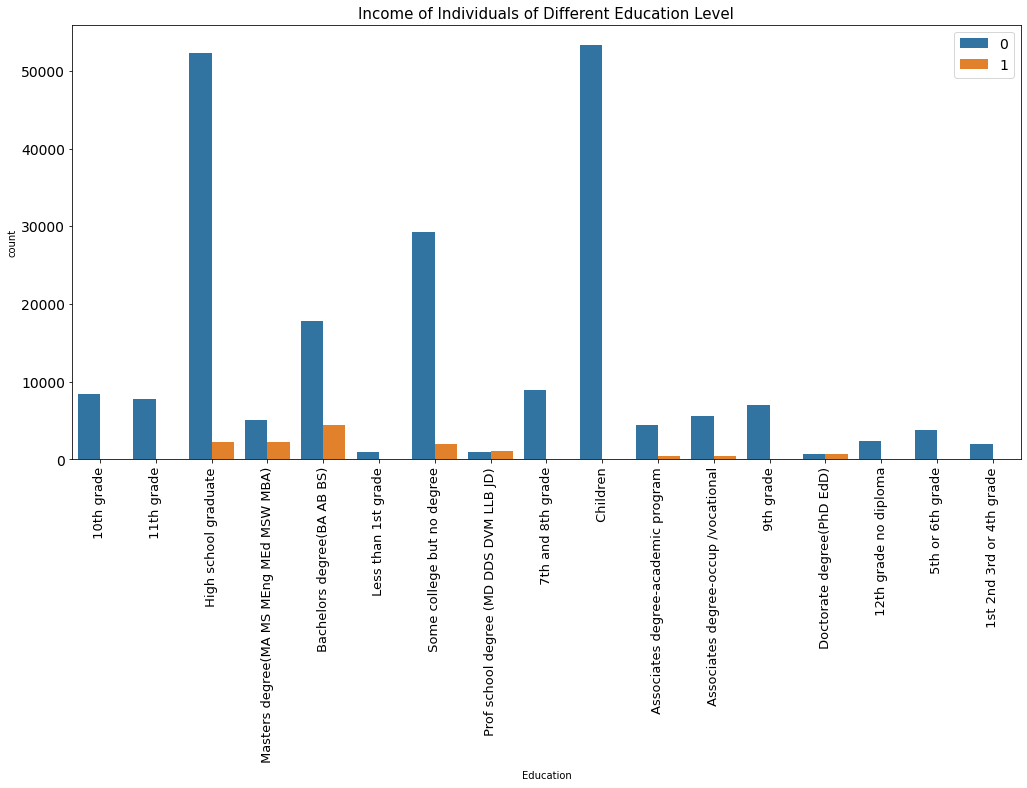

In [19]:
plt.figure(figsize=(17,8))
sns.countplot(train['Education'], hue = train['Target'])
plt.title('Income of Individuals of Different Education Level', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

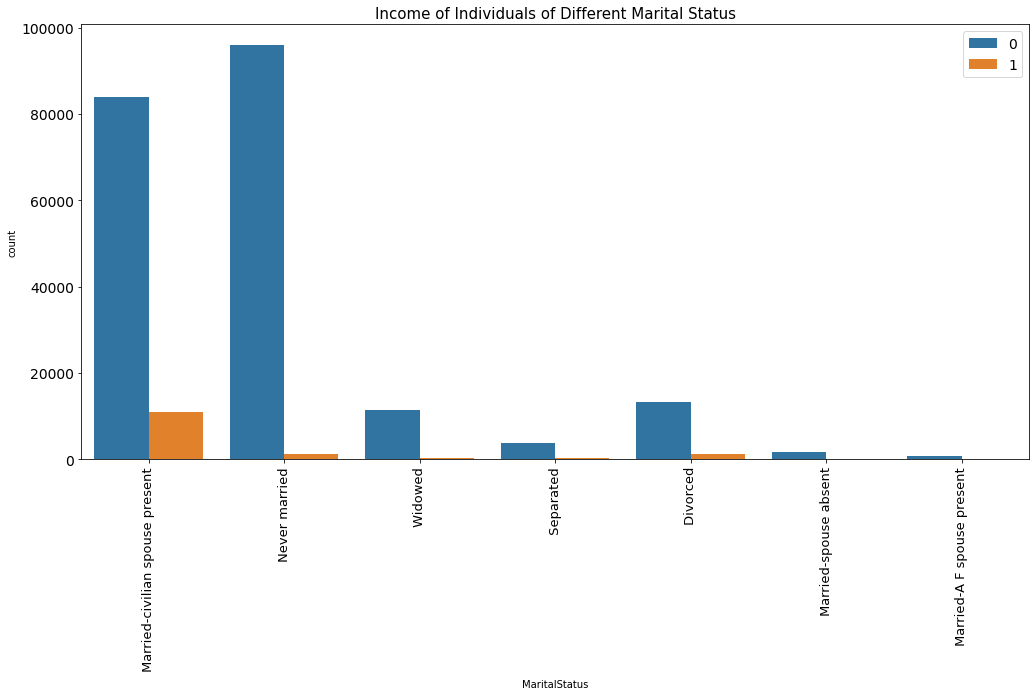

In [20]:
plt.figure(figsize=(17,8))
sns.countplot(train['MaritalStatus'], hue = train['Target'])
plt.title('Income of Individuals of Different Marital Status', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

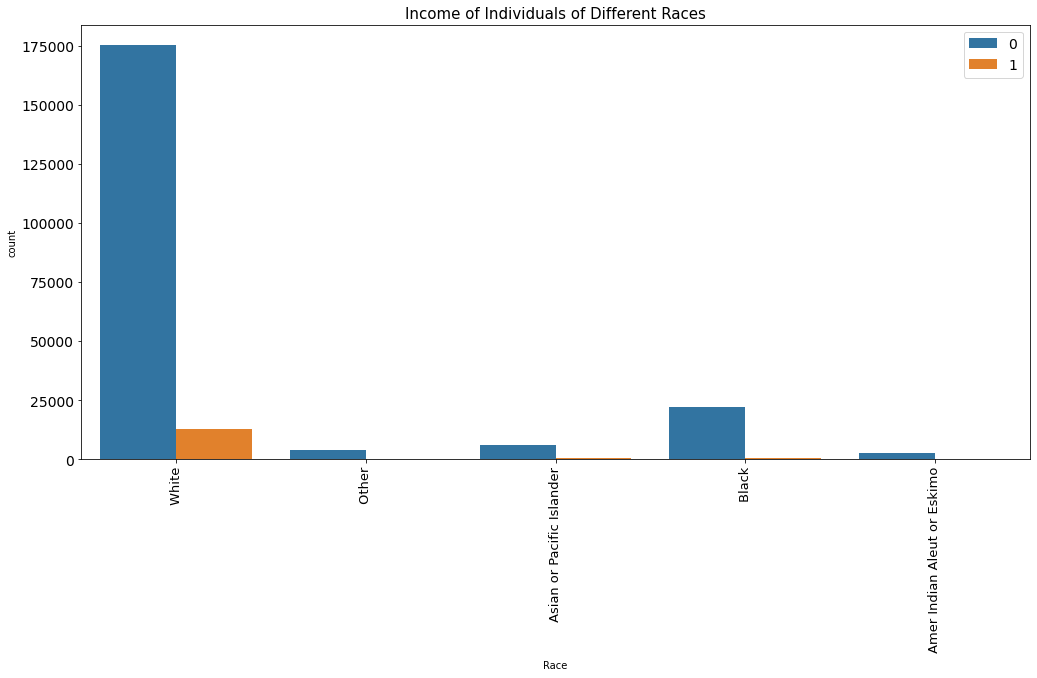

In [21]:
plt.figure(figsize=(17,8))
sns.countplot(train['Race'], hue = train['Target'])
plt.title('Income of Individuals of Different Races', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

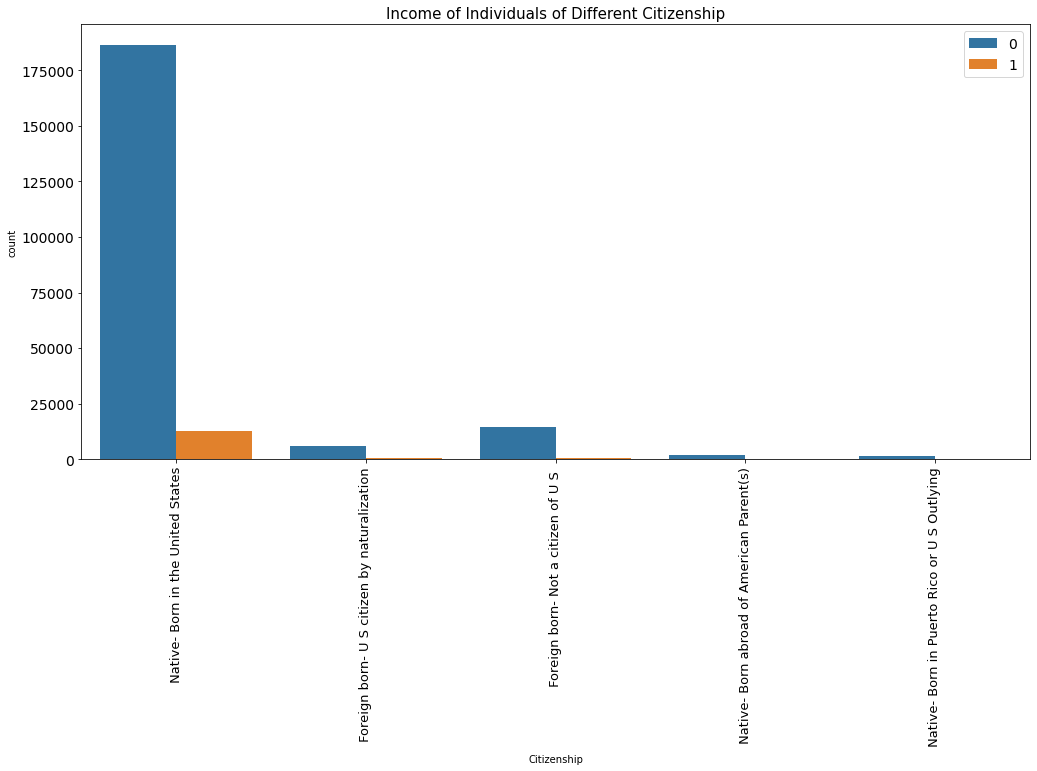

In [22]:
plt.figure(figsize=(17,8))
sns.countplot(train['Citizenship'], hue = train['Target'])
plt.title('Income of Individuals of Different Citizenship', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

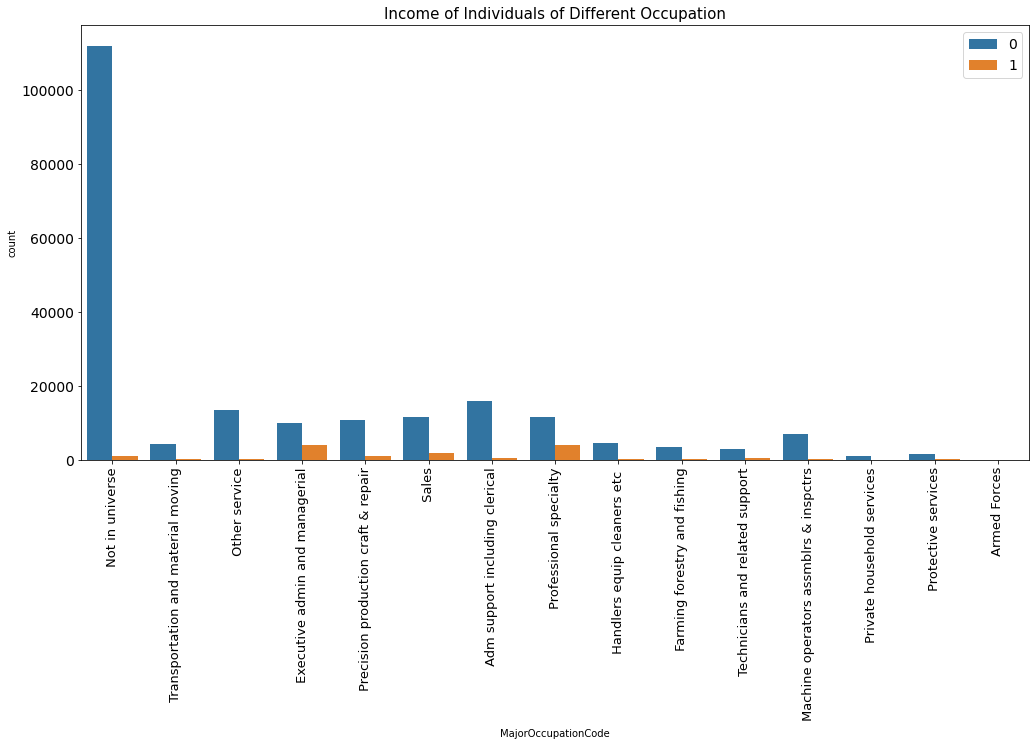

In [23]:
plt.figure(figsize=(17,8))
sns.countplot(train['MajorOccupationCode'], hue = train['Target'])
plt.title('Income of Individuals of Different Occupation', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

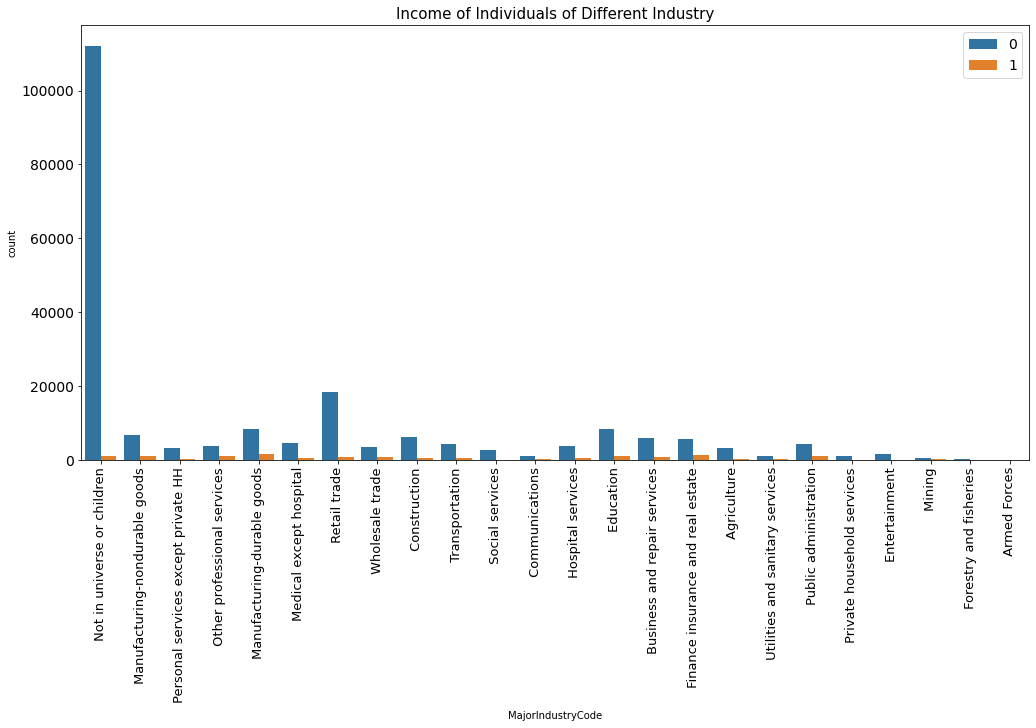

In [24]:
plt.figure(figsize=(17,8))
sns.countplot(train['MajorIndustryCode'], hue = train['Target'])
plt.title('Income of Individuals of Different Industry', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

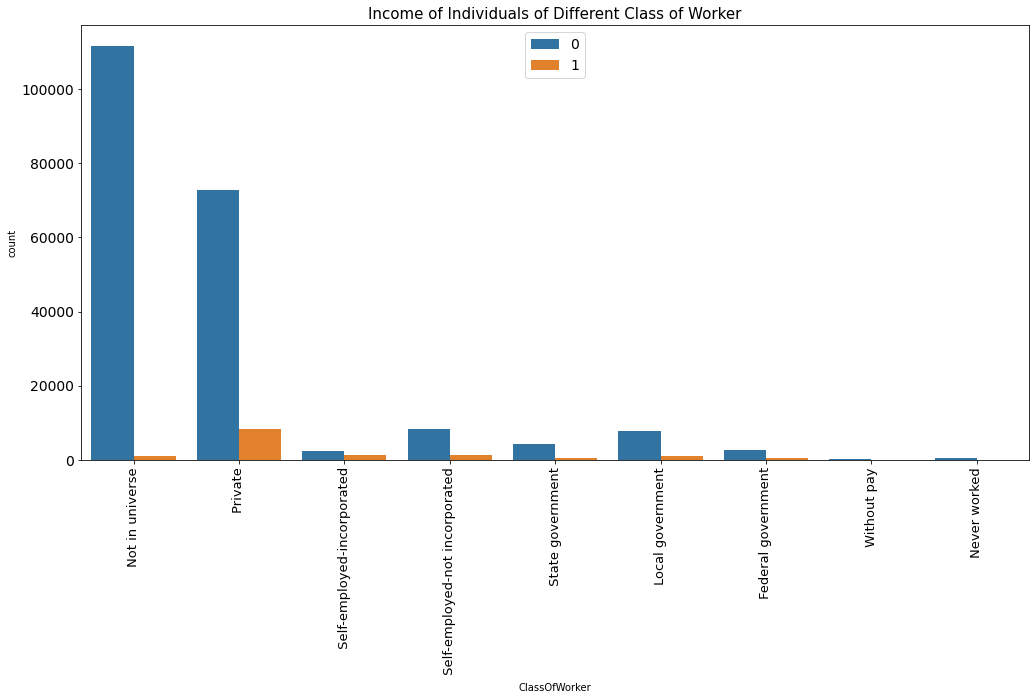

In [25]:
plt.figure(figsize=(17,8))
sns.countplot(train['ClassOfWorker'], hue = train['Target'])
plt.title('Income of Individuals of Different Class of Worker', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

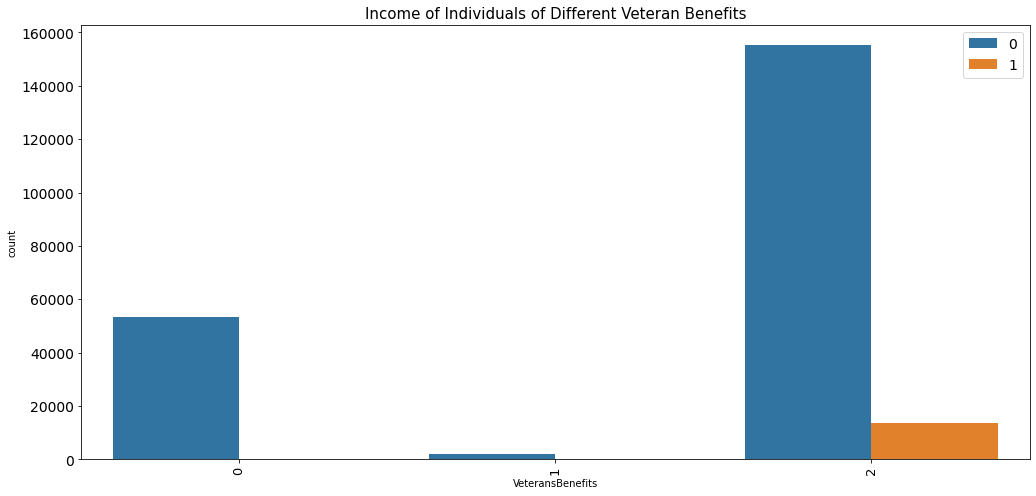

In [26]:
plt.figure(figsize=(17,8))
sns.countplot(train['VeteransBenefits'], hue = train['Target'])
plt.title('Income of Individuals of Different Veteran Benefits', fontsize=15)
plt.xticks(fontsize=13,rotation = 90)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# Feature Engineering

## Marital Status

In [12]:
train['MaritalStatus'].value_counts()

 Never married                      97232
 Married-civilian spouse present    94770
 Divorced                           14395
 Widowed                            11771
 Separated                           3856
 Married-spouse absent               1696
 Married-A F spouse present           743
Name: MaritalStatus, dtype: int64

In [13]:
train["MaritalStatus"] = train["MaritalStatus"].replace(['Divorced','Separated','Married-spouse absent','Widowed','Married-A F spouse present'], 
                                                        'No_Spouse', regex=True)

In [14]:
train['MaritalStatus'].value_counts()

 Never married                      97232
 Married-civilian spouse present    94770
 No_Spouse                          32461
Name: MaritalStatus, dtype: int64

## Workclass

In [15]:
train['ClassOfWorker'].value_counts()

 Not in universe                   112609
 Private                            81152
 Self-employed-not incorporated      9593
 Local government                    8753
 State government                    4757
 Self-employed-incorporated          3654
 Federal government                  3268
 Never worked                         500
 Without pay                          177
Name: ClassOfWorker, dtype: int64

In [16]:
train["ClassOfWorker"] = train["ClassOfWorker"].replace(['Local government', 'State government','Federal government'], 'Gov', regex=True)
train["ClassOfWorker"] = train["ClassOfWorker"].replace(['Never worked', 'Without pay'], 'Without_pay', regex=True)
train["ClassOfWorker"] = train["ClassOfWorker"].replace(['Self-employed-not incorporated','Self-employed-incorporated'], 'Self-employed', regex=True)

In [17]:
train['ClassOfWorker'].value_counts()

 Not in universe    112609
 Private             81152
 Gov                 16778
 Self-employed       13247
 Without_pay           677
Name: ClassOfWorker, dtype: int64

## Education

In [18]:
train['Education'].value_counts()

 High school graduate                      54559
 Children                                  53305
 Some college but no degree                31216
 Bachelors degree(BA AB BS)                22214
 7th and 8th grade                          9027
 10th grade                                 8460
 11th grade                                 7805
 Masters degree(MA MS MEng MEd MSW MBA)     7314
 9th grade                                  7021
 Associates degree-occup /vocational        6074
 Associates degree-academic program         4819
 5th or 6th grade                           3798
 12th grade no diploma                      2460
 1st 2nd 3rd or 4th grade                   2029
 Prof school degree (MD DDS DVM LLB JD)     2015
 Doctorate degree(PhD EdD)                  1437
 Less than 1st grade                         910
Name: Education, dtype: int64

In [19]:
train["Education"] = train["Education"].replace(['7th and 8th grade', '10th grade','11th grade', '9th grade', '5th or 6th grade',
                                                '1st 2nd 3rd or 4th grade','Less than 1st grade', '12th grade no diploma'], 
                                                'School', regex=True)
train["Education"] = train["Education"].replace(['High school graduate', 'Some college but no degree'], 
                                                'College', regex=True)

train["Education"] = train["Education"].replace(['Prof school degree \(MD DDS DVM LLB JD\)', 'Doctorate degree\(PhD EdD\)'], 
                                                'Doctorate', regex=True)

train["Education"] = train["Education"].replace(['Associates degree-occup /vocational', 'Associates degree-academic program'], 
                                                'Assoc', regex=True)                  
                                                                       

In [20]:
train["Education"].value_counts()

 College                                   85775
 Children                                  53305
 School                                    41510
 Bachelors degree(BA AB BS)                22214
 Assoc                                     10893
 Masters degree(MA MS MEng MEd MSW MBA)     7314
 Doctorate                                  3452
Name: Education, dtype: int64

## Our strategy is to determine most informative columns via CatBoost feature importance function and $\phi_K$ correlation figure.

In [21]:
from phik.report import plot_correlation_matrix

phik_overview = train.phik_matrix()

interval columns not set, guessing: ['ID', 'Age', 'IndustryCode', 'OccupationCode', 'WagePerHour', 'CapitalGains', 'CapitalLosses', 'DividendsFromStocks', 'InstanceWeight', 'NumOfPersonsWorkForEmployer', 'OwnBusinessOrSelfEmployed', 'VeteransBenefits', 'WeeksWorkedInYear', 'Year', 'Target']


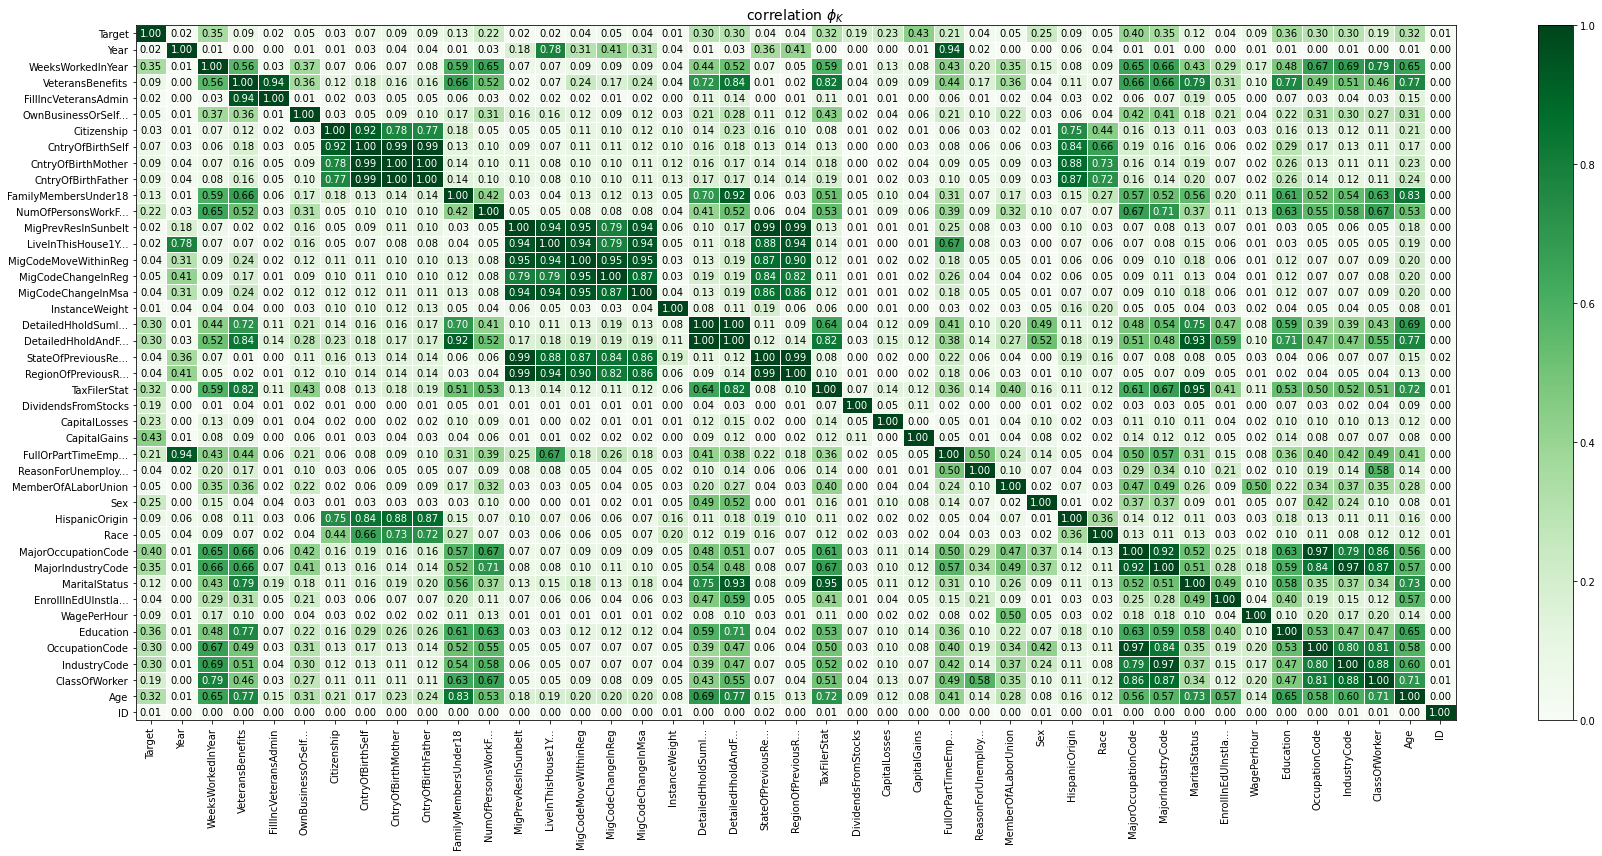

In [22]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(25, 12))
plt.tight_layout()

interval columns not set, guessing: ['ID', 'Age', 'IndustryCode', 'OccupationCode', 'WagePerHour', 'CapitalGains', 'CapitalLosses', 'DividendsFromStocks', 'InstanceWeight', 'NumOfPersonsWorkForEmployer', 'OwnBusinessOrSelfEmployed', 'VeteransBenefits', 'WeeksWorkedInYear', 'Year', 'Target']


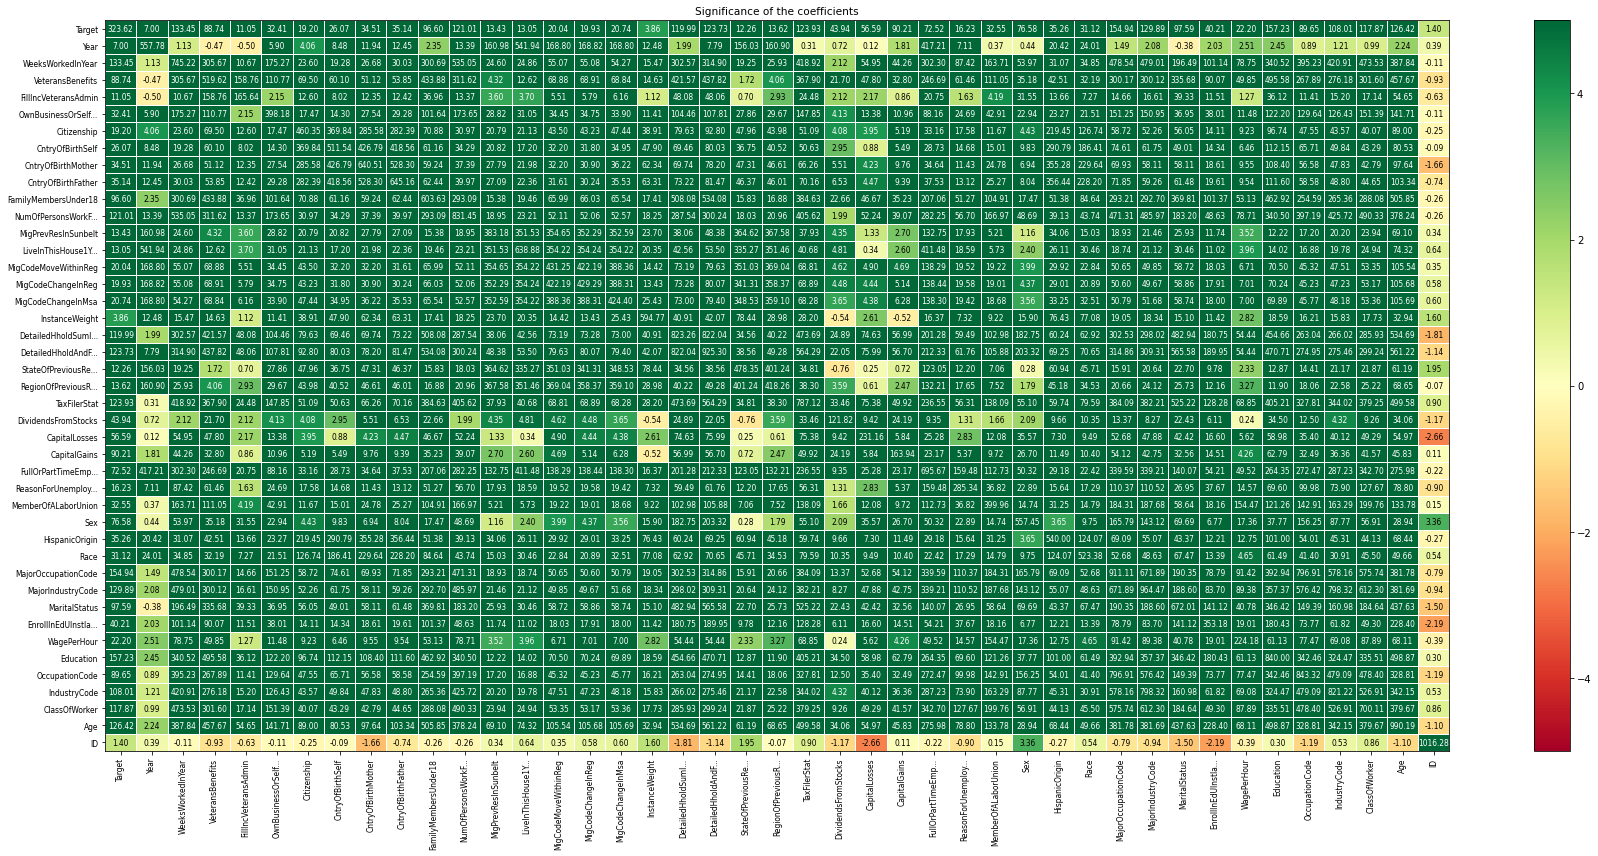

In [23]:
significance_overview = train.significance_matrix()
plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        vmin=-5, vmax=5, title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=0.75, figsize=(25, 12))
plt.tight_layout()

### Drop Target Value

In [21]:
target = train['Target']

train = train.drop(columns=['Target'])
train.head()

,ID,Age,ClassOfWorker,IndustryCode,OccupationCode,Education,WagePerHour,EnrollInEdUInstlastWk,MaritalStatus,MajorIndustryCode,...,FamilyMembersUnder18,CntryOfBirthFather,CntryOfBirthMother,CntryOfBirthSelf,Citizenship,OwnBusinessOrSelfEmployed,FillIncVeteransAdmin,VeteransBenefits,WeeksWorkedInYear,Year
0,40327,42,Not in universe,0,0,School,0,Not in universe,Married-civilian spouse present,Not in universe or children,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
1,200913,26,Private,19,39,School,0,Not in universe,Never married,Manufacturing-nondurable goods,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,2,Not in universe,2,51,94
2,221821,35,Self-employed,39,32,College,0,Not in universe,Married-civilian spouse present,Personal services except private HH,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95
3,121138,63,Not in universe,0,0,College,0,Not in universe,No_Spouse,Not in universe or children,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95
4,257791,27,Private,45,3,Masters degree(MA MS MEng MEd MSW MBA),0,Not in universe,Never married,Other professional services,...,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,94


### Standard Training Procedure

In [151]:
for cols in train.columns:
    if train[cols].dtypes.name == 'object':
        train[cols] = train[cols].astype('category')

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train[train.columns[1:]], target, shuffle=True, test_size=0.33, stratify=target)

In [153]:
cat_cols = list(X_train.select_dtypes(include='category').columns)

In [157]:
from catboost import CatBoostClassifier

cb = CatBoostClassifier(iterations=1000, task_type='GPU',eval_metric='MCC',random_seed=150)

In [160]:
cb.fit(X_train,y_train,cat_features=cat_cols, eval_set=(X_test,y_test), use_best_model=True,verbose=100)

Learning rate set to 0.046501
0:	learn: 0.4676126	test: 0.4607067	best: 0.4607067 (0)	total: 28.1ms	remaining: 28.1s
100:	learn: 0.5310530	test: 0.5277738	best: 0.5277738 (100)	total: 2.78s	remaining: 24.7s
200:	learn: 0.5631801	test: 0.5484531	best: 0.5484531 (200)	total: 5.57s	remaining: 22.1s
300:	learn: 0.5788198	test: 0.5607910	best: 0.5607910 (300)	total: 8.43s	remaining: 19.6s
400:	learn: 0.5893312	test: 0.5670519	best: 0.5674079 (399)	total: 11.3s	remaining: 16.9s
500:	learn: 0.5962754	test: 0.5706628	best: 0.5707221 (498)	total: 14.1s	remaining: 14.1s
600:	learn: 0.6014328	test: 0.5734915	best: 0.5736693 (574)	total: 17s	remaining: 11.3s
700:	learn: 0.6074291	test: 0.5723156	best: 0.5739040 (610)	total: 19.7s	remaining: 8.41s
800:	learn: 0.6125258	test: 0.5739607	best: 0.5743130 (796)	total: 22.4s	remaining: 5.55s
900:	learn: 0.6190582	test: 0.5750170	best: 0.5763059 (877)	total: 24.9s	remaining: 2.73s
999:	learn: 0.6230039	test: 0.5765405	best: 0.5769496 (996)	total: 27.5s	re

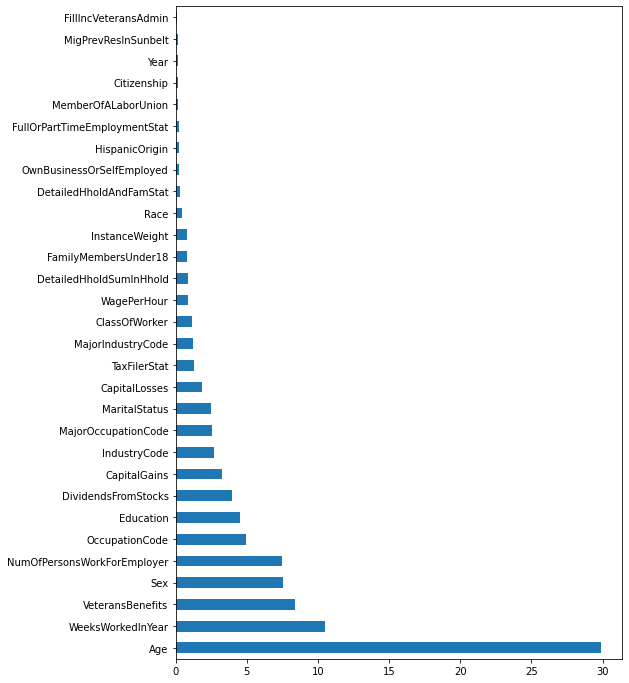

In [161]:
feat_imp = pd.Series(cb.feature_importances_, index=X_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,12))
plt.show()

Learning rate set to 0.046501
0:	learn: 0.4252654	test: 0.4338794	best: 0.4338794 (0)	total: 32.6ms	remaining: 32.6s
999:	learn: 0.6215684	test: 0.5803933	best: 0.5803950 (988)	total: 25.8s	remaining: 0us
bestTest = 0.5803949855
bestIteration = 988
Shrink model to first 989 iterations.


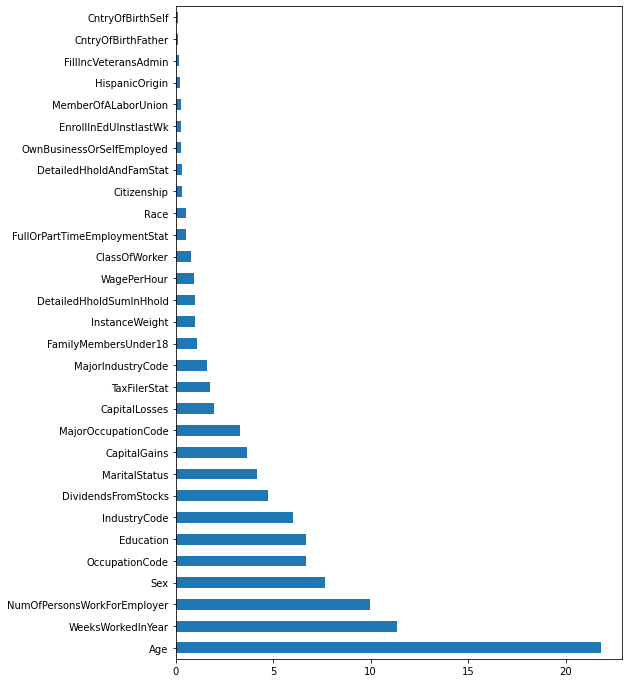

Learning rate set to 0.046501
0:	learn: 0.3169988	test: 0.3204395	best: 0.3204395 (0)	total: 26.9ms	remaining: 26.9s
bestTest = 0.5801505606
bestIteration = 790
Shrink model to first 791 iterations.


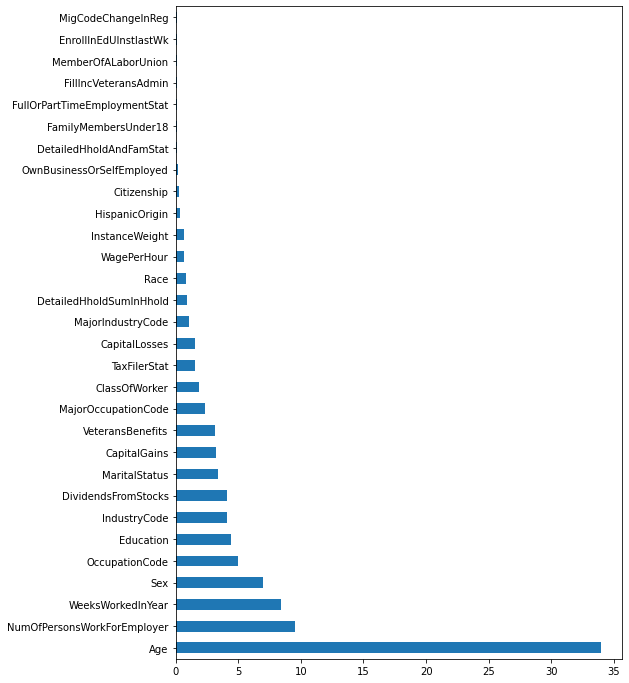

Learning rate set to 0.046501
0:	learn: 0.3521597	test: 0.3590601	best: 0.3590601 (0)	total: 22.3ms	remaining: 22.3s
999:	learn: 0.6226633	test: 0.5795195	best: 0.5798678 (990)	total: 23.2s	remaining: 0us
bestTest = 0.5798678062
bestIteration = 990
Shrink model to first 991 iterations.


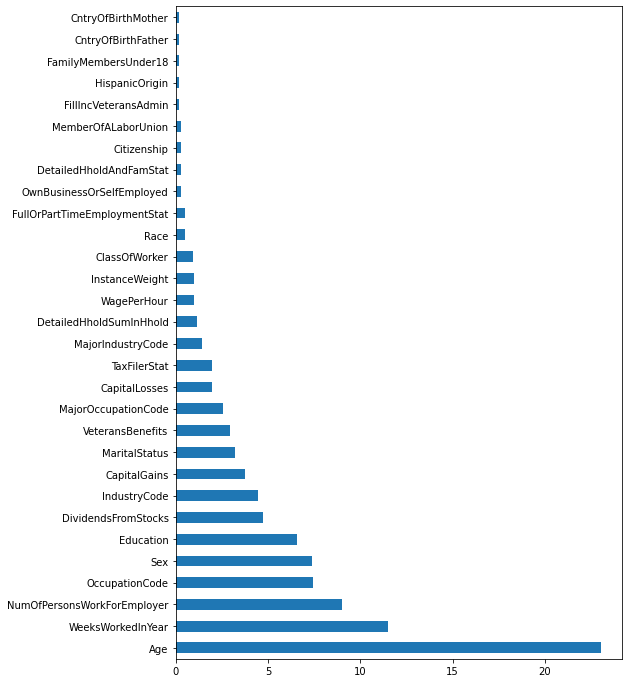

Learning rate set to 0.046501
0:	learn: 0.4493300	test: 0.4592363	best: 0.4592363 (0)	total: 26.4ms	remaining: 26.4s
999:	learn: 0.6226539	test: 0.5835372	best: 0.5835372 (999)	total: 24.5s	remaining: 0us
bestTest = 0.5835371891
bestIteration = 999


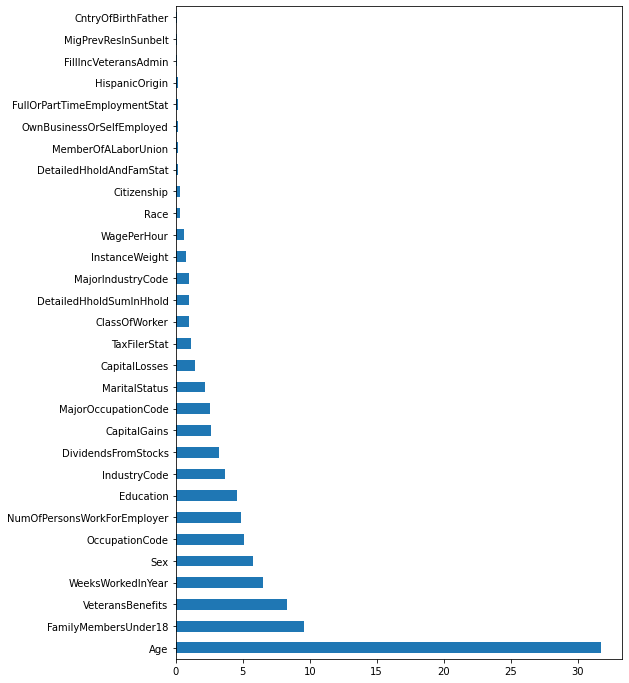

Learning rate set to 0.046501
0:	learn: 0.3269131	test: 0.3229006	best: 0.3229006 (0)	total: 28.6ms	remaining: 28.6s
bestTest = 0.5773154281
bestIteration = 635
Shrink model to first 636 iterations.


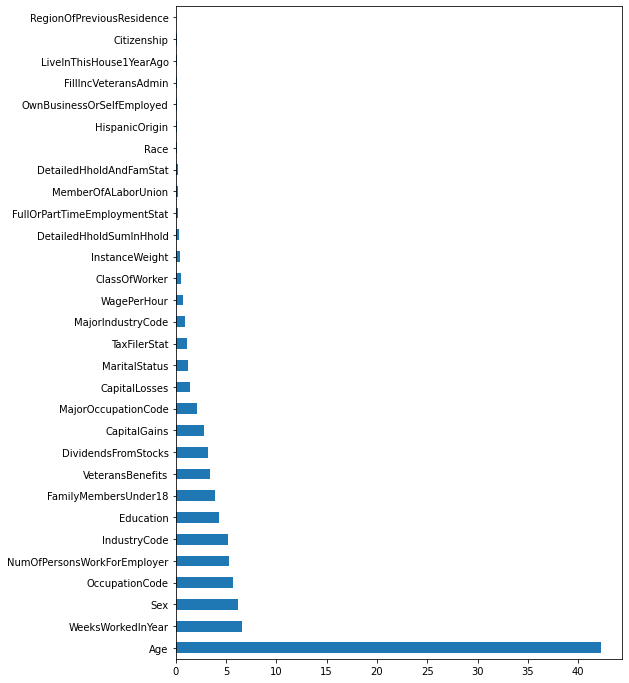

In [30]:
seeds = [42,43,44,45,46]
for seed in seeds:
    cb = CatBoostClassifier(iterations=1000, task_type='GPU',eval_metric='MCC',random_seed=seed)
    cb.fit(X_train,y_train,cat_features=cat_cols, eval_set=(X_test,y_test),early_stopping_rounds=100, use_best_model=True,plot=False,verbose=1000)
    cb.best_score_
    feat_imp = pd.Series(cb.feature_importances_, index=X_train.columns)
    feat_imp.nlargest(30).plot(kind='barh', figsize=(8,12))
    plt.show()

### Selecting Features

In [162]:
train_data = train[['WeeksWorkedInYear', 'NumOfPersonsWorkForEmployer','CapitalGains','CapitalLosses','DividendsFromStocks','VeteransBenefits',
                    'TaxFilerStat','MajorOccupationCode','MajorIndustryCode','IndustryCode', 'OccupationCode','MaritalStatus', 'Education','Age', 'ClassOfWorker','Sex']]

In [163]:
for cols in train_data.columns:
    if train_data[cols].dtypes.name == 'object':
        train_data[cols] = train_data[cols].astype('category')

In [164]:
train_data.head()

,WeeksWorkedInYear,NumOfPersonsWorkForEmployer,CapitalGains,CapitalLosses,DividendsFromStocks,VeteransBenefits,TaxFilerStat,MajorOccupationCode,MajorIndustryCode,IndustryCode,OccupationCode,MaritalStatus,Education,Age,ClassOfWorker,Sex
0,0,0,0,0,0,2,Nonfiler,Not in universe,Not in universe or children,0,0,Married-civilian spouse present,School,42,Not in universe,Male
1,51,6,0,0,0,2,Single,Transportation and material moving,Manufacturing-nondurable goods,19,39,Never married,School,26,Private,Male
2,52,2,0,0,0,2,Joint both under 65,Other service,Personal services except private HH,39,32,Married-civilian spouse present,College,35,Self-employed,Male
3,0,0,0,0,0,2,Single,Not in universe,Not in universe or children,0,0,No_Spouse,College,63,Not in universe,Female
4,0,0,0,0,0,2,Nonfiler,Executive admin and managerial,Other professional services,45,3,Never married,Masters degree(MA MS MEng MEd MSW MBA),27,Private,Male


# Catboost Training with Selected Features

In [165]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_data, target, shuffle=True, test_size=0.33, stratify=target)

In [167]:
cat_cols = list(X_train.select_dtypes(include='category').columns)

In [168]:
cat_cols

['TaxFilerStat',
 'MajorOccupationCode',
 'MajorIndustryCode',
 'MaritalStatus',
 'Education',
 'ClassOfWorker',
 'Sex']

In [169]:
from catboost import CatBoostClassifier

cb_new = CatBoostClassifier(iterations=1000, task_type='GPU',eval_metric='MCC',random_seed=45)

In [170]:
cb_new.fit(X_train,y_train,cat_features=cat_cols, eval_set=(X_test,y_test),verbose=50)

Learning rate set to 0.046501
0:	learn: 0.3789523	test: 0.3836691	best: 0.3836691 (0)	total: 13ms	remaining: 13s
50:	learn: 0.4804910	test: 0.4875860	best: 0.4875860 (50)	total: 740ms	remaining: 13.8s
100:	learn: 0.5304462	test: 0.5299083	best: 0.5299083 (100)	total: 1.47s	remaining: 13s
150:	learn: 0.5513820	test: 0.5474474	best: 0.5475755 (149)	total: 2.18s	remaining: 12.3s
200:	learn: 0.5623713	test: 0.5584663	best: 0.5584663 (200)	total: 2.94s	remaining: 11.7s
250:	learn: 0.5699361	test: 0.5618280	best: 0.5620648 (249)	total: 3.7s	remaining: 11s
300:	learn: 0.5755128	test: 0.5666783	best: 0.5666783 (300)	total: 4.44s	remaining: 10.3s
350:	learn: 0.5813612	test: 0.5684756	best: 0.5684997 (334)	total: 5.2s	remaining: 9.61s
400:	learn: 0.5854395	test: 0.5715307	best: 0.5717085 (399)	total: 5.93s	remaining: 8.85s
450:	learn: 0.5892838	test: 0.5716063	best: 0.5722420 (434)	total: 6.65s	remaining: 8.1s
500:	learn: 0.5929393	test: 0.5729698	best: 0.5731559 (490)	total: 7.38s	remaining: 7.

In [171]:
from sklearn.metrics import matthews_corrcoef

preds = cb_new.predict(X_test)
matthews_corrcoef(y_test, preds)

0.583484986156763

<AxesSubplot:>

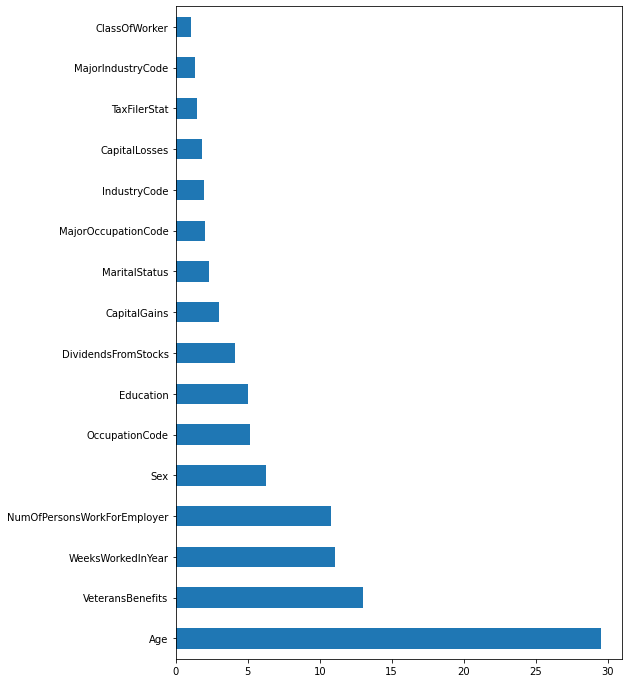

In [172]:
feat_imp = pd.Series(cb_new.feature_importances_, index=X_train.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,12))

# Hyperparameter Tuning

## Bayesian Optimization

In [186]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import * 
from sklearn.metrics import *

def CB_opt(n_estimators, depth, learning_rate, max_bin,
             subsample, num_leaves, l2_leaf_reg, model_size_reg): 
  scores = []
  skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 45)
  for train_index, test_index in skf.split(X_train, y_train):
    
    trainx, valx = X_train.iloc[train_index], X_train.iloc[test_index]
    trainy, valy = y_train.iloc[train_index], y_train.iloc[test_index]
 
    reg = CatBoostClassifier(verbose = 0,
                            n_estimators = int(n_estimators),
                            learning_rate = learning_rate,
                            subsample = subsample, 
                            l2_leaf_reg = l2_leaf_reg,
                            max_depth = int(depth),
                            num_leaves = int(num_leaves),
                            random_state = 45,
                            grow_policy = "Lossguide",
                            max_bin = int(max_bin),  
                            use_best_model = True,
                            model_size_reg = model_size_reg,
                           
                            )
    
    reg.fit(trainx, trainy, eval_set = (valx, valy), cat_features=cat_cols)
    scores.append(matthews_corrcoef(valy, reg.predict(valx)))
  return np.mean(scores)

pbounds = {"n_estimators": (150,400),
           "depth": (2,7),
           "learning_rate": (.01, 0.2),
           "subsample":(0.6, 1.),
           "num_leaves": (16,40),
           "max_bin":(150,300),
           "l2_leaf_reg":(0,10),
           "model_size_reg": (0,10)
}
optimizer = BayesianOptimization(
    f = CB_opt,
    pbounds = pbounds,
    verbose = 2,
    random_state = 45,
)

optimizer.maximize(init_points = 2, n_iter = 20)

print(optimizer.max)

|   iter    |  target   |   depth   | l2_lea... | learni... |  max_bin  | model_... | n_esti... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------
|  1        |  0.5673   |  6.945    |  5.495    |  0.06347  |  161.6    |  4.445    |  268.2    |  17.16    |  0.6653   |
|  2        |  0.5506   |  2.58     |  6.274    |  0.1727   |  247.5    |  9.907    |  267.6    |  30.84    |  0.7131   |
|  3        |  0.5734   |  6.252    |  3.342    |  0.1956   |  167.4    |  6.529    |  269.8    |  18.88    |  0.8667   |
|  4        |  0.5417   |  3.175    |  2.965    |  0.05365  |  180.7    |  9.522    |  274.2    |  26.89    |  0.8068   |
|  5        |  0.4551   |  4.16     |  1.77     |  0.01007  |  169.6    |  8.293    |  261.7    |  18.96    |  0.9956   |
|  6        |  0.5548   |  4.546    |  2.699    |  0.05119  |  168.1    |  9.768    |  271.1    |  17.02    |  0.6027   |
|  7        |  0.5746   

In [192]:
bayes_opt = CatBoostClassifier(verbose = 0,
                            n_estimators = int(273.32777447190705),
                            learning_rate = 0.09966007334408275,
                            subsample = 0.7161915986079038, 
                            l2_leaf_reg = 0.6645746640039096,
                            max_depth = int(6.20455801860472),
                            num_leaves = int(27.275224066305334),
                            random_state = 45,
                            eval_metric='MCC',
                            grow_policy = "Lossguide",
                            max_bin = int(163.72583910886934),  
                            use_best_model = True,
                            model_size_reg = 0.2530081385689109,                 
                            )

bayes_opt.fit(X_train,y_train,cat_features=cat_cols, eval_set=(X_test,y_test),verbose=50)                            

0:	learn: 0.4614219	test: 0.4591530	best: 0.4591530 (0)	total: 22.1ms	remaining: 6.01s
50:	learn: 0.5636389	test: 0.5556177	best: 0.5556177 (50)	total: 922ms	remaining: 4.01s
100:	learn: 0.5860718	test: 0.5692472	best: 0.5694826 (97)	total: 1.89s	remaining: 3.21s
150:	learn: 0.5990550	test: 0.5798817	best: 0.5798817 (150)	total: 2.82s	remaining: 2.28s
200:	learn: 0.6139397	test: 0.5845378	best: 0.5845378 (200)	total: 3.74s	remaining: 1.34s
250:	learn: 0.6239108	test: 0.5840156	best: 0.5848914 (201)	total: 4.59s	remaining: 402ms
272:	learn: 0.6270796	test: 0.5838756	best: 0.5849286 (268)	total: 4.97s	remaining: 0us

bestTest = 0.5849286497
bestIteration = 268

Shrink model to first 269 iterations.


In [193]:
from sklearn.metrics import matthews_corrcoef

preds = bayes_opt.predict(X_test)
matthews_corrcoef(y_test, preds)

0.5849286497032948

## Random Search

In [204]:
from scipy.stats import randint
from sklearn.metrics import matthews_corrcoef, make_scorer
from sklearn.model_selection import RandomizedSearchCV
cbc = CatBoostClassifier(iterations=1000, task_type='GPU',eval_metric='MCC', random_seed=45)


mcc_scorer = make_scorer(matthews_corrcoef)
param_dist = { "learning_rate": np.linspace(0,0.2,5),
               "max_depth": randint(2, 10)}
cat = {
    "cat_features" : cat_cols,
    "verbose"  :1000,
    "eval_set": (X_test,y_test),
    "use_best_model": True
}

In [205]:
rscv = RandomizedSearchCV(cbc , param_dist, scoring=mcc_scorer, cv=5, n_iter=5)

In [206]:
rscv.fit(X_train,y_train,**cat)

0:	learn: 0.3760636	test: 0.3784107	best: 0.3784107 (0)	total: 16ms	remaining: 16s
999:	learn: 0.7929297	test: 0.5675914	best: 0.5783523 (371)	total: 18.2s	remaining: 0us
bestTest = 0.5783522926
bestIteration = 371
Shrink model to first 372 iterations.
0:	learn: 0.4237328	test: 0.4301830	best: 0.4301830 (0)	total: 20ms	remaining: 19.9s
999:	learn: 0.7943794	test: 0.5639183	best: 0.5737276 (434)	total: 18.1s	remaining: 0us
bestTest = 0.573727607
bestIteration = 434
Shrink model to first 435 iterations.
0:	learn: 0.3799990	test: 0.3781216	best: 0.3781216 (0)	total: 17.6ms	remaining: 17.6s
999:	learn: 0.7953947	test: 0.5639571	best: 0.5781799 (359)	total: 19s	remaining: 0us
bestTest = 0.5781799279
bestIteration = 359
Shrink model to first 360 iterations.
0:	learn: 0.3355422	test: 0.3304001	best: 0.3304001 (0)	total: 17.4ms	remaining: 17.4s
999:	learn: 0.7945840	test: 0.5705639	best: 0.5808596 (252)	total: 17.9s	remaining: 0us
bestTest = 0.5808595875
bestIteration = 252
Shrink model to fir

RandomizedSearchCV(cv=5,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7f70ecb002d0>,
                   n_iter=5,
                   param_distributions={'learning_rate': array([0.  , 0.05, 0.1 , 0.15, 0.2 ]),
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f70ecb00250>},
                   scoring=make_scorer(matthews_corrcoef))

In [221]:
print(rscv.best_params_)
print(rscv.best_score_)

{'learning_rate': 0.1, 'max_depth': 6}
0.5731950111628453


In [219]:
best_cbc = CatBoostClassifier(iterations=2000, task_type='GPU',eval_metric='MCC',learning_rate=0.1,max_depth=6, random_seed=45,use_best_model=True)

In [220]:
best_cbc.fit(X_train,y_train,cat_features=cat_cols, eval_set=(X_test,y_test), verbose=100)

0:	learn: 0.3789523	test: 0.3836691	best: 0.3836691 (0)	total: 12.8ms	remaining: 25.6s
100:	learn: 0.5662996	test: 0.5626196	best: 0.5626196 (100)	total: 1.38s	remaining: 26s
200:	learn: 0.5891232	test: 0.5705476	best: 0.5709772 (197)	total: 2.77s	remaining: 24.8s
300:	learn: 0.6041176	test: 0.5738608	best: 0.5753595 (284)	total: 4.16s	remaining: 23.5s
400:	learn: 0.6153275	test: 0.5796414	best: 0.5804719 (392)	total: 5.65s	remaining: 22.5s
500:	learn: 0.6249785	test: 0.5834940	best: 0.5837882 (497)	total: 7.17s	remaining: 21.5s
600:	learn: 0.6332226	test: 0.5860999	best: 0.5862191 (560)	total: 8.69s	remaining: 20.2s
700:	learn: 0.6413217	test: 0.5844764	best: 0.5864936 (626)	total: 10.2s	remaining: 18.9s
800:	learn: 0.6502845	test: 0.5855760	best: 0.5864936 (626)	total: 11.7s	remaining: 17.6s
900:	learn: 0.6570644	test: 0.5835941	best: 0.5864936 (626)	total: 13.2s	remaining: 16.2s
1000:	learn: 0.6632522	test: 0.5852726	best: 0.5864936 (626)	total: 14.8s	remaining: 14.8s
1100:	learn: 0

In [225]:
from sklearn.metrics import matthews_corrcoef

preds = rscv.best_estimator_.predict(X_test)
matthews_corrcoef(y_test, preds)

0.5881347740634415

# Test Data

In [226]:
test["MaritalStatus"] = test["MaritalStatus"].replace(['Divorced','Separated','Married-spouse absent','Widowed','Married-A F spouse present'], 
                                                        'No_Spouse', regex=True)

test["ClassOfWorker"] = test["ClassOfWorker"].replace(['Local government', 'State government','Federal government'], 'Gov', regex=True)
test["ClassOfWorker"] = test["ClassOfWorker"].replace(['Never worked', 'Without pay'], 'Without_pay', regex=True)
test["ClassOfWorker"] = test["ClassOfWorker"].replace(['Self-employed-not incorporated','Self-employed-incorporated'], 'Self-employed', regex=True)

test["Education"] = test["Education"].replace(['7th and 8th grade', '10th grade','11th grade', '9th grade', '5th or 6th grade',
                                                '1st 2nd 3rd or 4th grade','Less than 1st grade', '12th grade no diploma'], 
                                                'School', regex=True)
test["Education"] = test["Education"].replace(['High school graduate', 'Some college but no degree'], 
                                                'College', regex=True)

test["Education"] = test["Education"].replace(['Prof school degree \(MD DDS DVM LLB JD\)', 'Doctorate degree\(PhD EdD\)'], 
                                                'Doctorate', regex=True)

test["Education"] = test["Education"].replace(['Associates degree-occup /vocational', 'Associates degree-academic program'], 
                                                'Assoc', regex=True)  

test_data = test[['WeeksWorkedInYear', 'NumOfPersonsWorkForEmployer','CapitalGains','CapitalLosses','DividendsFromStocks','VeteransBenefits',
                    'TaxFilerStat','MajorOccupationCode','MajorIndustryCode','IndustryCode', 'OccupationCode','MaritalStatus', 'Education','Age', 'ClassOfWorker','Sex']]

In [227]:
test_data.head()

,WeeksWorkedInYear,NumOfPersonsWorkForEmployer,CapitalGains,CapitalLosses,DividendsFromStocks,VeteransBenefits,TaxFilerStat,MajorOccupationCode,MajorIndustryCode,IndustryCode,OccupationCode,MaritalStatus,Education,Age,ClassOfWorker,Sex
0,0,0,0,0,0,0,Nonfiler,Not in universe,Not in universe or children,0,0,Never married,Children,3,Not in universe,Male
1,0,0,0,0,2000,2,Joint both under 65,Not in universe,Not in universe or children,0,0,Married-civilian spouse present,College,37,Not in universe,Female
2,52,4,0,1887,450,2,Joint both under 65,Executive admin and managerial,Manufacturing-durable goods,9,2,Married-civilian spouse present,College,53,Private,Male
3,52,4,0,0,0,2,Single,Sales,Entertainment,40,19,Never married,College,53,Private,Female
4,52,4,0,0,0,2,Single,Other service,Retail trade,33,29,Never married,College,19,Private,Male


In [228]:
pred_test = rscv.best_estimator_.predict(test_data)
sub = pd.Series(pred_test, name='Target')
final = pd.concat([test.ID, sub],axis=1)
final.head(15)

,ID,Target
0,135501,0
1,112251,0
2,6295,1
3,290358,0
4,16704,0
5,189111,0
6,183784,0
7,126487,0
8,14721,1
9,286398,0


In [229]:
final.to_csv('best_cbc.csv', index=False)

# Save Best Model

In [234]:
rscv.best_estimator_.save_model('best_model',format='cbm',pool=train_data)